## Actividad 1.2

- Fernando Guadarrama				A01379340
- Camila Trujillo					A01737170
- Mauricio Goris					A01736428
- Bernardo Quintana 	            A01658064

In [1601]:
%pip install funpymodeling
%pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1602]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
from funpymodeling.exploratory import freq_tbl

In [1603]:
#Cargamos los datos
data = pd.read_csv('DataAnalytics.csv')

In [1604]:
# Utilizamos head para imprimir las primeras filas del dataframe
data.head(20)

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,fecha,Juego,auto push,tiempo de lección,tiempo de sesión
0,nicolas,nicolas,1.0,5.399169,Despegue,1.0,blue,Episodio 1,25/01/2024 09:26:42 a. m.,Astro,0.0,0.00000,0.0
1,nicolas,nicolas,0.0,1.283400,Despegue,2.0,violet,Episodio 1,25/01/2024 09:26:46 a. m.,Astro,0.0,0.00000,0.0
2,nicolas,nicolas,1.0,2.700226,Despegue,3.0,green,Episodio 1,25/01/2024 09:26:48 a. m.,Astro,0.0,0.00000,0.0
3,nicolas,nicolas,0.0,3.050262,Despegue,4.0,green,Episodio 1,25/01/2024 09:26:57 a. m.,Astro,0.0,0.00000,0.0
4,nicolas,nicolas,0.0,4.750256,Despegue,5.0,green,Episodio 1,25/01/2024 09:26:58 a. m.,Astro,0.0,0.00000,0.0
5,nicolas,nicolas,0.0,7.400463,Despegue,6.0,green,Episodio 1,25/01/2024 09:27:01 a. m.,Astro,0.0,0.00000,0.0
6,nicolas,nicolas,0.0,13.167350,Despegue,7.0,green,Episodio 1,25/01/2024 09:27:07 a. m.,Astro,0.0,0.00000,0.0
7,nicolas,nicolas,1.0,22.467780,Despegue,8.0,yellow,Episodio 1,25/01/2024 09:27:16 a. m.,Astro,0.0,0.00000,0.0
8,nicolas,nicolas,0.0,14.517180,Despegue,9.0,green,Episodio 1,25/01/2024 09:27:37 a. m.,Astro,0.0,0.00000,0.0
9,nicolas,nicolas,0.0,15.617350,Despegue,10.0,blue,Episodio 1,25/01/2024 09:27:38 a. m.,Astro,0.0,0.00000,0.0


In [1605]:
#Buscamos valores nulos y calculamos porcentajes por columna
valores_nulos1 = data.isnull().sum()
print(valores_nulos1)

Administrador              0
Usuario                    0
botón correcto           762
tiempo de interacción    762
mini juego               156
número de interacción    762
color presionado         762
dificultad                 0
fecha                      0
Juego                      0
auto push                762
tiempo de lección        177
tiempo de sesión         606
dtype: int64


In [1606]:
print(data.dtypes)

Administrador             object
Usuario                   object
botón correcto           float64
tiempo de interacción    float64
mini juego                object
número de interacción    float64
color presionado          object
dificultad                object
fecha                     object
Juego                     object
auto push                float64
tiempo de lección        float64
tiempo de sesión         float64
dtype: object


In [1607]:
numericas = data.select_dtypes(include=['int64', 'float64'])
cualitativas = data.select_dtypes(include=['object'])

numericas_generales = numericas.drop(['tiempo de sesión', 'tiempo de lección'], axis=1)
numericas_generales_sin_nulos = numericas_generales.fillna(numericas_generales.mean())


In [1608]:
tiempo_sesion = numericas['tiempo de sesión']
tiempo_leccion = numericas['tiempo de lección']

media_sesion_sin_ceros = tiempo_sesion.mean()
media_leccion_sin_ceros = tiempo_leccion.mean()

tiempo_sesion_sin_nulos = tiempo_sesion.fillna(media_sesion_sin_ceros)
tiempo_leccion_sin_nulos = tiempo_leccion.fillna(media_leccion_sin_ceros)

In [1609]:
numericas_con0 = pd.concat([tiempo_sesion_sin_nulos, tiempo_leccion_sin_nulos], axis=1)

<Figure size 1500x1000 with 0 Axes>

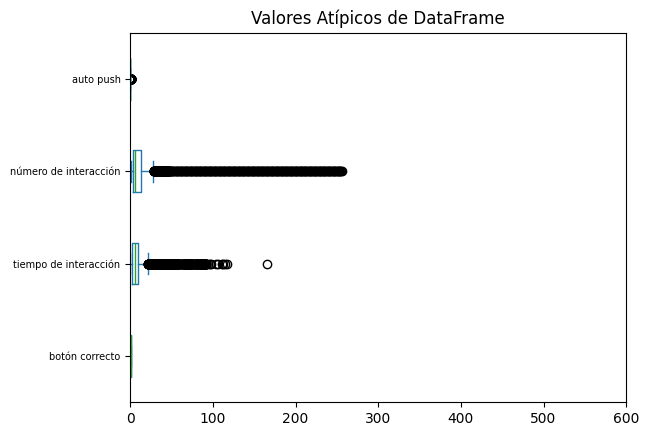

In [1610]:
fig = plt.figure(figsize = (15,10))
numericas_generales_sin_nulos.plot(kind='box', vert=False)
plt.xlim([0, 600])
plt.title('Valores Atípicos de DataFrame')
plt.yticks(fontsize=7, rotation=0)
plt.show()

In [1611]:
y=numericas_generales_sin_nulos

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido botón correcto            2.50000
tiempo de interacción    21.81771
número de interacción    28.84852
auto push                 0.00000
dtype: float64
Limite inferior permitido botón correcto           -1.500000
tiempo de interacción    -9.731186
número de interacción   -12.509112
auto push                 0.000000
dtype: float64


In [1612]:
data2_iqr= numericas_generales_sin_nulos[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data2_iqr.head(5)

,botón correcto,tiempo de interacción,número de interacción,auto push
0,1.0,5.399169,1.0,0.0
1,0.0,1.283400,2.0,0.0
2,1.0,2.700226,3.0,0.0
3,0.0,3.050262,4.0,0.0
4,0.0,4.750256,5.0,0.0


In [1613]:
valores_nulos2=data2_iqr.isnull().sum()
valores_nulos2

botón correcto             0
tiempo de interacción    669
número de interacción    371
auto push                816
dtype: int64

In [1614]:
data3_iqr=data2_iqr.copy()
data3_iqr=data2_iqr.fillna(round(data2_iqr.mean(),1))
data3_iqr.head(10)


,botón correcto,tiempo de interacción,número de interacción,auto push
0,1.0,5.399169,1.0,0.0
1,0.0,1.283400,2.0,0.0
2,1.0,2.700226,3.0,0.0
3,0.0,3.050262,4.0,0.0
4,0.0,4.750256,5.0,0.0
5,0.0,7.400463,6.0,0.0
6,0.0,13.167350,7.0,0.0
7,1.0,5.900000,8.0,0.0
8,0.0,14.517180,9.0,0.0
9,0.0,15.617350,10.0,0.0


<Figure size 1500x1000 with 0 Axes>

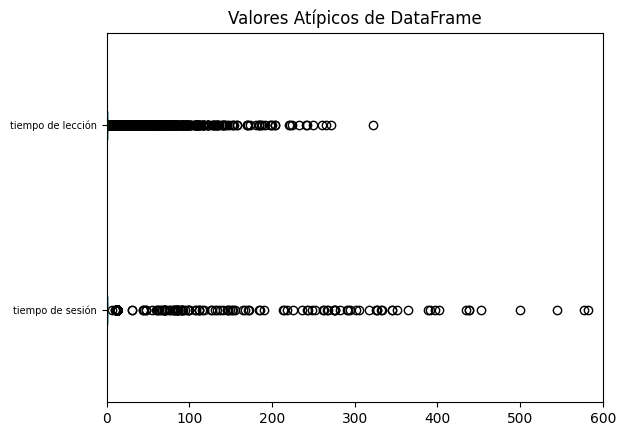

In [1615]:
fig = plt.figure(figsize = (15,10))
numericas_con0.plot(kind='box', vert=False)
plt.xlim([0, 600])
plt.title('Valores Atípicos de DataFrame')
plt.yticks(fontsize=7, rotation=0)
plt.show()

In [1616]:
y = numericas_con0

percentile1 = y.quantile(0.01) 
percentile99 = y.quantile(0.99)  

print("Límite superior permitido: ", percentile99)
print("Límite inferior permitido: ", percentile1)

Límite superior permitido:  tiempo de sesión     296.973188
tiempo de lección    118.946856
Name: 0.99, dtype: float64
Límite inferior permitido:  tiempo de sesión     0.0
tiempo de lección    0.0
Name: 0.01, dtype: float64


In [1617]:
data4_iqr = numericas_con0[(y<=percentile99)&(y>=percentile1)]
data4_iqr.head(5)

,tiempo de sesión,tiempo de lección
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [1618]:
valores_nulos3=data4_iqr.isnull().sum()
valores_nulos3

tiempo de sesión     59
tiempo de lección    59
dtype: int64

In [1619]:
data5_iqr=data4_iqr.copy()
data5_iqr=data4_iqr.fillna(round(data4_iqr.mean(),1))
data5_iqr.head(10)

,tiempo de sesión,tiempo de lección
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [1620]:
valores_nulos4=data5_iqr.isnull().sum()
valores_nulos4

tiempo de sesión     0
tiempo de lección    0
dtype: int64

In [1621]:
data_final = pd.concat([cualitativas.fillna("Sin Dato"), data3_iqr, data5_iqr], axis=1)

In [1622]:
data_final.head(10)

,Administrador,Usuario,mini juego,color presionado,dificultad,fecha,Juego,botón correcto,tiempo de interacción,número de interacción,auto push,tiempo de sesión,tiempo de lección
0,nicolas,nicolas,Despegue,blue,Episodio 1,25/01/2024 09:26:42 a. m.,Astro,1.0,5.399169,1.0,0.0,0.0,0.0
1,nicolas,nicolas,Despegue,violet,Episodio 1,25/01/2024 09:26:46 a. m.,Astro,0.0,1.283400,2.0,0.0,0.0,0.0
2,nicolas,nicolas,Despegue,green,Episodio 1,25/01/2024 09:26:48 a. m.,Astro,1.0,2.700226,3.0,0.0,0.0,0.0
3,nicolas,nicolas,Despegue,green,Episodio 1,25/01/2024 09:26:57 a. m.,Astro,0.0,3.050262,4.0,0.0,0.0,0.0
4,nicolas,nicolas,Despegue,green,Episodio 1,25/01/2024 09:26:58 a. m.,Astro,0.0,4.750256,5.0,0.0,0.0,0.0
5,nicolas,nicolas,Despegue,green,Episodio 1,25/01/2024 09:27:01 a. m.,Astro,0.0,7.400463,6.0,0.0,0.0,0.0
6,nicolas,nicolas,Despegue,green,Episodio 1,25/01/2024 09:27:07 a. m.,Astro,0.0,13.167350,7.0,0.0,0.0,0.0
7,nicolas,nicolas,Despegue,yellow,Episodio 1,25/01/2024 09:27:16 a. m.,Astro,1.0,5.900000,8.0,0.0,0.0,0.0
8,nicolas,nicolas,Despegue,green,Episodio 1,25/01/2024 09:27:37 a. m.,Astro,0.0,14.517180,9.0,0.0,0.0,0.0
9,nicolas,nicolas,Despegue,blue,Episodio 1,25/01/2024 09:27:38 a. m.,Astro,0.0,15.617350,10.0,0.0,0.0,0.0


In [1623]:
valores_nulos5=data_final.isnull().sum()
valores_nulos5

Administrador            0
Usuario                  0
mini juego               0
color presionado         0
dificultad               0
fecha                    0
Juego                    0
botón correcto           0
tiempo de interacción    0
número de interacción    0
auto push                0
tiempo de sesión         0
tiempo de lección        0
dtype: int64

In [1624]:
freq_tbl(data_final)

     Administrador  frequency  percentage  cumulative_perc
0           ALEIDA       3260    0.555840         0.555840
1          nicolas        440    0.075021         0.630861
2         LEONARDO        371    0.063257         0.694118
3          DENISSE        302    0.051492         0.745610
4     SERGIO ANGEL        243    0.041432         0.787042
5   CARLOS ENRIQUE        228    0.038875         0.825916
6       YAEL DAVID        224    0.038193         0.864109
7           AUSTIN        199    0.033930         0.898039
8         VALENTIN        163    0.027792         0.925831
9            erick        158    0.026939         0.952771
10   IKER BENJAMIN        128    0.021824         0.974595
11          KYTZIA         98    0.016709         0.991304
12        BENJAMIN         51    0.008696         1.000000

----------------------------------------------------------------

               Usuario  frequency  percentage  cumulative_perc
0            LEONARDO         546    0.09309

In [1625]:
table1 = freq_tbl(data_final['Administrador'])
table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
Filtro_index1 = table2.set_index('Administrador')
Filtro_index1

,frequency
Administrador,
ALEIDA,3260
nicolas,440
LEONARDO,371
DENISSE,302
SERGIO ANGEL,243
CARLOS ENRIQUE,228
YAEL DAVID,224
AUSTIN,199
VALENTIN,163


Text(0, 0.5, 'Frecuencia')

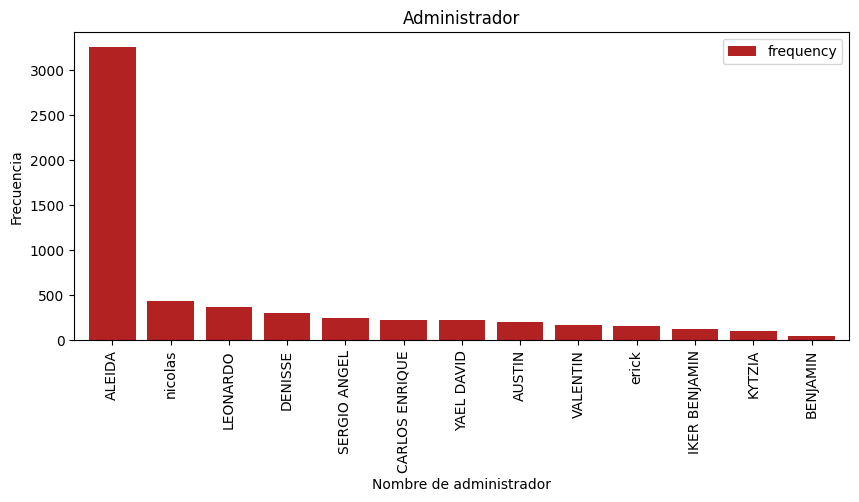

In [1626]:
Filtro_index1.plot(kind = 'bar', width=0.8, figsize=(10,4), color='firebrick')
plt.title('Administrador')
plt.xlabel('Nombre de administrador')
plt.ylabel('Frecuencia')

In [1627]:
table3 = freq_tbl(data_final['Usuario'])
table4 = table3.drop(['percentage', 'cumulative_perc'], axis=1)
Filtro_index2 = table4.set_index('Usuario')
Filtro_index2

,frequency
Usuario,
LEONARDO,546
ALEIDA,487
nicolas,440
JOSE JAVIER,394
LEONARDO,371
JESUS ALEJANDRO,356
ramiro isai,332
ADRIAN,280
SERGIO ANGEL,243


Text(0, 0.5, 'Frecuencia')

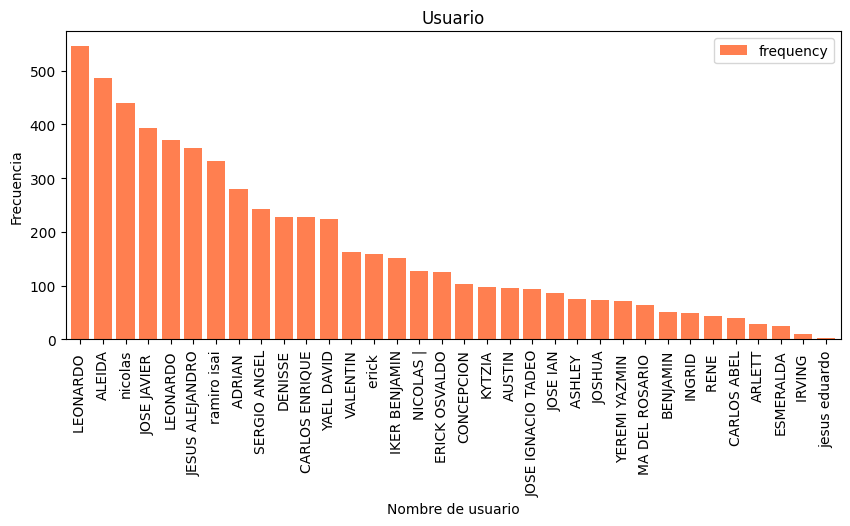

In [1628]:
Filtro_index2.plot(kind = 'bar', width=0.8, figsize=(10,4), color='coral')
plt.title('Usuario')
plt.xlabel('Nombre de usuario')
plt.ylabel('Frecuencia')

In [1629]:
table5 = freq_tbl(data_final['mini juego'])
table6 = table5.drop(['percentage', 'cumulative_perc'], axis=1)
Filtro_index3 = table6.set_index('mini juego')
Filtro_index3

,frequency
mini juego,
Asteroides,1054
Restaurante,869
Estrellas,813
Gusanos,748
sonidos y animales,743
animales y colores,545
figuras y colores,400
partes del cuerpo,320
Despegue,196


<Axes: xlabel='mini juego'>

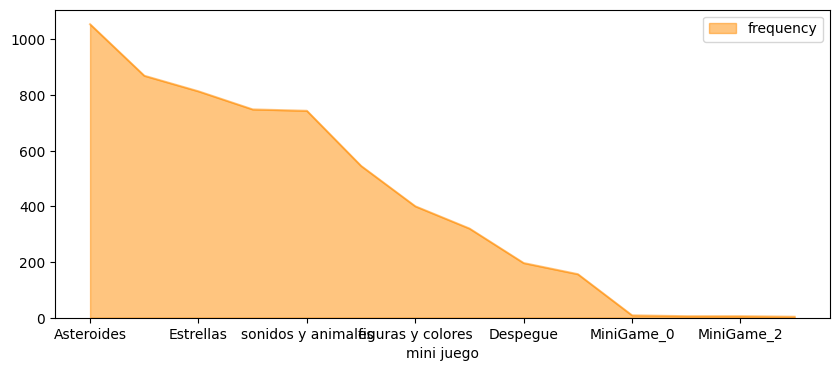

In [1630]:
Filtro_index3.plot(kind='area', figsize=(10,4), alpha = 0.5, color='darkorange')

In [1631]:
table7 = freq_tbl(data_final['color presionado'])
table8 = table7.drop(['percentage', 'cumulative_perc'], axis=1)
Filtro_index4 = table8.set_index('color presionado')
Filtro_index4

,frequency
color presionado,
violet,1361
green,1298
yellow,1233
blue,1182
Sin Dato,762
red,29


<Axes: xlabel='color presionado'>

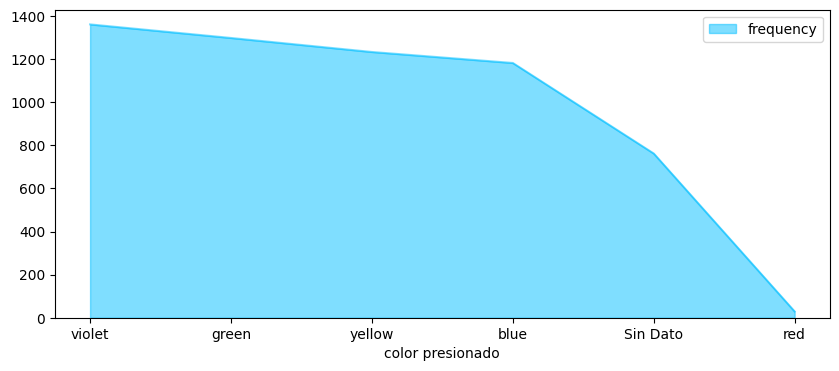

In [1632]:
Filtro_index4.plot(kind='area', figsize=(10,4), alpha = 0.5, color='deepskyblue')

In [1633]:
table9 = freq_tbl(data_final['dificultad'])
table10 = table9.drop(['percentage', 'cumulative_perc'], axis=1)
Filtro_index5 = table10.set_index('dificultad')
Filtro_index5

,frequency
dificultad,
Episodio 1,2357
Episodio 2,1493
Episodio 3,1292
Episodio 4,723


<Axes: ylabel='frequency'>

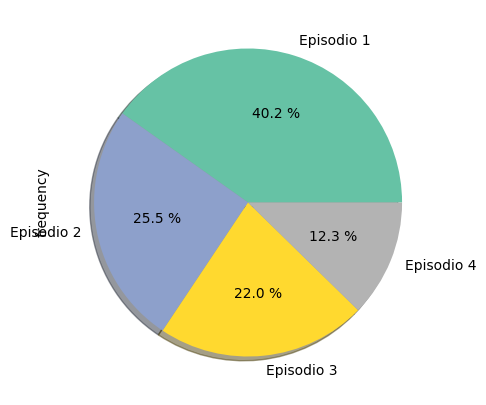

In [1634]:
Filtro_index5['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%', colormap='Set2')

In [1635]:
table11 = freq_tbl(data_final['fecha'])
table12 = table11.drop(['percentage', 'cumulative_perc'], axis=1)
Filtro = table12[table12['frequency']>5]
Filtro_index6 = Filtro.set_index('fecha')
Filtro_index6

,frequency
fecha,
12/01/2024 04:37:26 p. m.,12
13/01/2024 09:42:44 a. m.,11
01/02/2024 09:35:47 a. m.,8
14/03/2024 02:37:22 p. m.,6
14/03/2024 02:37:21 p. m.,6


Text(0, 0.5, 'Frecuencia')

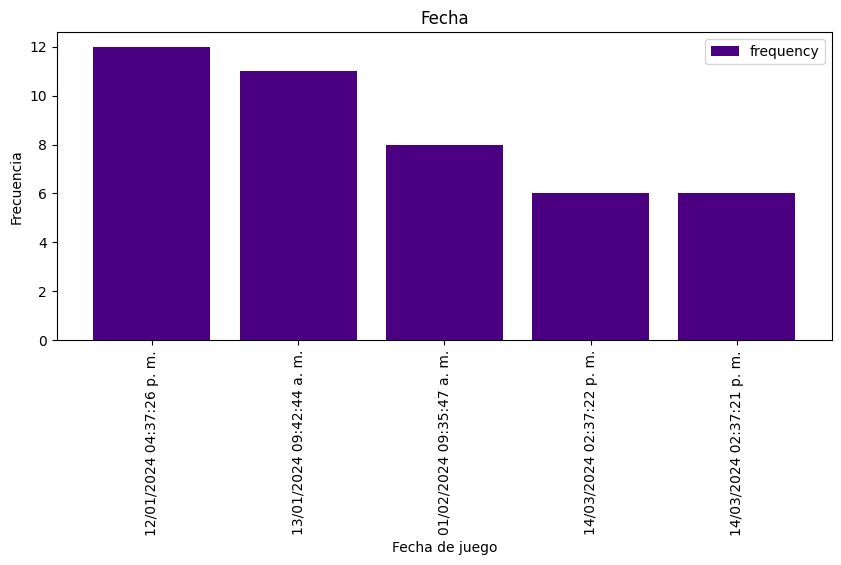

In [1636]:
Filtro_index6.plot(kind = 'bar', width=0.8, figsize=(10,4), color='indigo')
plt.title('Fecha')
plt.xlabel('Fecha de juego')
plt.ylabel('Frecuencia')

In [1637]:
table13 = freq_tbl(data_final['Juego'])
table14 = table13.drop(['percentage', 'cumulative_perc'], axis=1)
Filtro_index7 = table14.set_index('Juego')
Filtro_index7

,frequency
Juego,
Astro,3799
Cadetes,2066


<Axes: ylabel='frequency'>

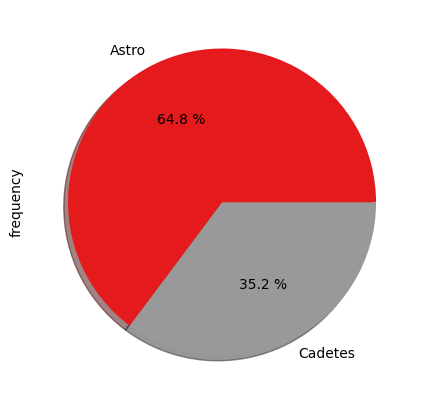

In [1638]:
Filtro_index7['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%', colormap='Set1')

In [1639]:
data_final.to_excel("CHECAR6.xlsx")

**Categorización variable tiempo de interacción**

In [1640]:
#Corroboramos valores nulos
valores_nulos6=data_final.isnull().sum()
valores_nulos6

Administrador            0
Usuario                  0
mini juego               0
color presionado         0
dificultad               0
fecha                    0
Juego                    0
botón correcto           0
tiempo de interacción    0
número de interacción    0
auto push                0
tiempo de sesión         0
tiempo de lección        0
dtype: int64

In [1641]:
#Calculamos el numero total de la población "n"
data_final['tiempo de interacción'].info()
n=5865

<class 'pandas.core.series.Series'>
RangeIndex: 5865 entries, 0 to 5864
Series name: tiempo de interacción
Non-Null Count  Dtype  
--------------  -----  
5865 non-null   float64
dtypes: float64(1)
memory usage: 45.9 KB


In [1642]:
Max=data_final['tiempo de interacción'].max()
Min=data_final['tiempo de interacción'].min()
Limites= [Min, Max]
Limites

[0.0, 21.78444]

In [1643]:
#Calculamos el rango R
R=Max-Min
R

21.78444

In [1644]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(n)
ni

13.51064981461914

In [1645]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

1.6123902476125347

In [1646]:
intervalos=np.linspace(0.0000, 21.78444, 4)
intervalos

array([ 0.     ,  7.26148, 14.52296, 21.78444])

In [1647]:
#Creamos las categorías 
categorias= ["Bajo 0-7", "Medio 7-14", "Alto 14-21"]

In [1648]:
#Finalmente creamos las categorías en la columna numérica
data_final['tiempo de interacción']=pd.cut(x= data_final['tiempo de interacción'], bins=intervalos, labels=categorias)
data_final['tiempo de interacción']

0         Bajo 0-7
1         Bajo 0-7
2         Bajo 0-7
3         Bajo 0-7
4         Bajo 0-7
5       Medio 7-14
6       Medio 7-14
7         Bajo 0-7
8       Medio 7-14
9       Alto 14-21
10      Alto 14-21
11      Alto 14-21
12      Medio 7-14
13      Medio 7-14
14      Medio 7-14
15        Bajo 0-7
16        Bajo 0-7
17        Bajo 0-7
18        Bajo 0-7
19        Bajo 0-7
20      Medio 7-14
21      Alto 14-21
22        Bajo 0-7
23        Bajo 0-7
24        Bajo 0-7
25        Bajo 0-7
26        Bajo 0-7
27      Medio 7-14
28        Bajo 0-7
29        Bajo 0-7
30      Medio 7-14
31        Bajo 0-7
32        Bajo 0-7
33      Medio 7-14
34      Alto 14-21
35        Bajo 0-7
36        Bajo 0-7
37        Bajo 0-7
38        Bajo 0-7
39        Bajo 0-7
40      Medio 7-14
41        Bajo 0-7
42        Bajo 0-7
43        Bajo 0-7
44        Bajo 0-7
45        Bajo 0-7
46        Bajo 0-7
47        Bajo 0-7
48        Bajo 0-7
49      Medio 7-14
50      Medio 7-14
51        Bajo 0-7
52        Ba

In [1649]:
conteo_categorias = data_final['tiempo de interacción'].value_counts().sort_index()

<Axes: ylabel='count'>

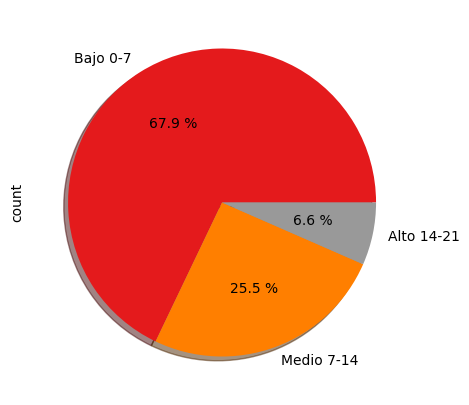

In [1650]:
conteo_categorias.plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%', colormap='Set1')

**Categorización variable tiempo de lección**

In [1651]:
#Calculamos el numero total de la población "n"
data_final['tiempo de lección'].info()
n=5865

<class 'pandas.core.series.Series'>
RangeIndex: 5865 entries, 0 to 5864
Series name: tiempo de lección
Non-Null Count  Dtype  
--------------  -----  
5865 non-null   float64
dtypes: float64(1)
memory usage: 45.9 KB


In [1652]:
Max1=data_final['tiempo de lección'].max() 
Min1=data_final['tiempo de lección'].min() 
Limites1= [Min1, Max1]
Limites1

[0.0, 117.8544]

In [1653]:
#Calculamos el rango R
R1=Max1-Min1
R1

117.8544

In [1654]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni1= 1+3.32*np.log10(n)
ni1

13.51064981461914

In [1655]:
#Calculamos el Ancho del Intervalo "i"
i1=R1/ni1
i1

8.723074139074804

In [1656]:
intervalos1 = np.linspace(-0.1, 117.8544, 4)
np.set_printoptions(suppress=True)  
intervalos1

array([ -0.1       ,  39.21813333,  78.53626667, 117.8544    ])

In [1657]:
#Creamos las categorías 
categorias1 = ["Bajo 0-39", "Medio 39-78", "Alto 78-118"]

In [1658]:
#Finalmente creamos las categorías en la columna numérica
data_final['tiempo de lección']=pd.cut(x= data_final['tiempo de lección'], bins=intervalos1, labels=categorias1 )
data_final['tiempo de lección']

0         Bajo 0-39
1         Bajo 0-39
2         Bajo 0-39
3         Bajo 0-39
4         Bajo 0-39
5         Bajo 0-39
6         Bajo 0-39
7         Bajo 0-39
8         Bajo 0-39
9         Bajo 0-39
10        Bajo 0-39
11        Bajo 0-39
12      Medio 39-78
13        Bajo 0-39
14        Bajo 0-39
15        Bajo 0-39
16        Bajo 0-39
17        Bajo 0-39
18        Bajo 0-39
19        Bajo 0-39
20        Bajo 0-39
21        Bajo 0-39
22        Bajo 0-39
23        Bajo 0-39
24        Bajo 0-39
25        Bajo 0-39
26        Bajo 0-39
27      Medio 39-78
28        Bajo 0-39
29        Bajo 0-39
30        Bajo 0-39
31        Bajo 0-39
32        Bajo 0-39
33        Bajo 0-39
34        Bajo 0-39
35        Bajo 0-39
36        Bajo 0-39
37        Bajo 0-39
38        Bajo 0-39
39        Bajo 0-39
40      Alto 78-118
41        Bajo 0-39
42        Bajo 0-39
43        Bajo 0-39
44        Bajo 0-39
45        Bajo 0-39
46        Bajo 0-39
47        Bajo 0-39
48        Bajo 0-39
49        Bajo 0-39


In [1659]:
conteo_categorias1 = data_final['tiempo de lección'].value_counts().sort_index()

<Axes: ylabel='count'>

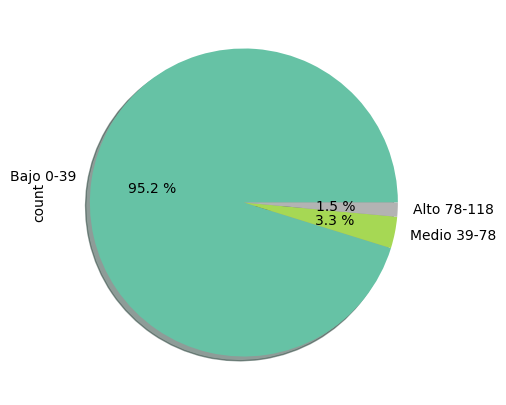

In [1660]:
conteo_categorias1.plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%', colormap='Set2')

**Categorización de variable tiempo de sesión**

In [1661]:
#Calculamos el numero total de la población "n"
data_final['tiempo de sesión'].info()
n=5865

<class 'pandas.core.series.Series'>
RangeIndex: 5865 entries, 0 to 5864
Series name: tiempo de sesión
Non-Null Count  Dtype  
--------------  -----  
5865 non-null   float64
dtypes: float64(1)
memory usage: 45.9 KB


In [1662]:
Max2=data_final['tiempo de sesión'].max()
Min2=data_final['tiempo de sesión'].min()
Limites2= [Min2, Max2]
Limites2

[0.0, 294.3935]

In [1663]:
#Calculamos el rango R
R=Max2-Min2
R

294.3935

In [1664]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(n)
ni

13.51064981461914

In [1665]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

21.7897365440893

In [1666]:
intervalos3 = np.linspace(-0.1, 294.3935, 4)  
np.set_printoptions(suppress=True)
intervalos3

array([ -0.1   ,  98.0645, 196.229 , 294.3935])

In [1667]:
#Creamos las categorías 
categorias3= ["Bajo 0-98", "Medio 98-196", "Alto 196-294"]

In [1668]:
#Finalmente creamos las categorías en la columna numérica
data_final['tiempo de sesión']=pd.cut(x= data_final['tiempo de sesión'], bins=intervalos3, labels=categorias3 )
data_final['tiempo de sesión']

0          Bajo 0-98
1          Bajo 0-98
2          Bajo 0-98
3          Bajo 0-98
4          Bajo 0-98
5          Bajo 0-98
6          Bajo 0-98
7          Bajo 0-98
8          Bajo 0-98
9          Bajo 0-98
10         Bajo 0-98
11         Bajo 0-98
12         Bajo 0-98
13         Bajo 0-98
14         Bajo 0-98
15         Bajo 0-98
16         Bajo 0-98
17         Bajo 0-98
18         Bajo 0-98
19         Bajo 0-98
20         Bajo 0-98
21         Bajo 0-98
22         Bajo 0-98
23         Bajo 0-98
24         Bajo 0-98
25         Bajo 0-98
26         Bajo 0-98
27         Bajo 0-98
28         Bajo 0-98
29         Bajo 0-98
30         Bajo 0-98
31         Bajo 0-98
32         Bajo 0-98
33         Bajo 0-98
34         Bajo 0-98
35         Bajo 0-98
36         Bajo 0-98
37         Bajo 0-98
38         Bajo 0-98
39         Bajo 0-98
40         Bajo 0-98
41         Bajo 0-98
42         Bajo 0-98
43         Bajo 0-98
44         Bajo 0-98
45         Bajo 0-98
46         Bajo 0-98
47         Ba

In [1670]:
conteo_categorias2 = data_final['tiempo de sesión'].value_counts().sort_index()

<Axes: ylabel='count'>

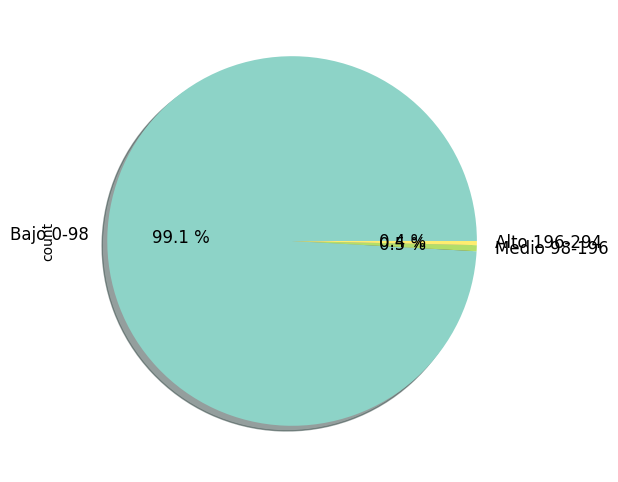

In [1678]:
conteo_categorias2.plot(kind='pie', figsize=(12,6), shadow=True, autopct='%0.1f %%', colormap='Set3', textprops={'fontsize': 12})